In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('chronic_full_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Age,BP,specific_gravity,Albumin,sugar,RBC,PC,PCC,...,packed_cell_volume,wbc_cnt,rbc_cnt,htn,diabetes,CAD,apetite,pedal_edema,anemia,class
0,0,0,48.0,80.0,1.020,1,0,normal,normal,notpresent,...,44.0,7800.0,5.0000,yes,yes,no,good,no,no,ckd
1,1,1,7.0,50.0,1.020,4,0,normal,normal,notpresent,...,38.0,6000.0,2.8525,no,no,no,good,no,no,ckd
2,2,2,62.0,80.0,1.010,2,3,normal,normal,notpresent,...,31.0,7500.0,2.8525,no,yes,no,poor,no,yes,ckd
3,3,3,48.0,70.0,1.005,4,0,normal,abnormal,present,...,32.0,6700.0,3.0000,yes,no,no,poor,yes,yes,ckd
4,4,4,51.0,80.0,1.010,2,0,normal,normal,notpresent,...,35.0,7300.0,4.0000,no,no,no,good,no,no,ckd


In [4]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [5]:
df.head()

,Age,BP,specific_gravity,Albumin,sugar,RBC,PC,PCC,bacteria,Blood_Gluc_rand,...,packed_cell_volume,wbc_cnt,rbc_cnt,htn,diabetes,CAD,apetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.0000,...,44.0,7800.0,5.0000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,131.7525,...,38.0,6000.0,2.8525,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0000,...,31.0,7500.0,2.8525,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0000,...,32.0,6700.0,3.0000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0000,...,35.0,7300.0,4.0000,no,no,no,good,no,no,ckd


In [6]:
df["class"] = df["class"].apply(lambda  x:1 if x=="ckd" else 0)

In [7]:
df.head()

,Age,BP,specific_gravity,Albumin,sugar,RBC,PC,PCC,bacteria,Blood_Gluc_rand,...,packed_cell_volume,wbc_cnt,rbc_cnt,htn,diabetes,CAD,apetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.0000,...,44.0,7800.0,5.0000,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,131.7525,...,38.0,6000.0,2.8525,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0000,...,31.0,7500.0,2.8525,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0000,...,32.0,6700.0,3.0000,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0000,...,35.0,7300.0,4.0000,no,no,no,good,no,no,1


In [8]:
df["class"].value_counts()

1    248
0    152
Name: class, dtype: int64

In [9]:
from sklearn import preprocessing

In [10]:
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

RBC
PC
PCC
bacteria
htn
apetite
pedal_edema
anemia
8 columns were label encoded.


In [11]:
df['diabetes'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [12]:
df['diabetes']=df['diabetes'].replace(' yes', 'yes')
df['diabetes']=df['diabetes'].replace('\tno', 'no')
df['diabetes']=df['diabetes'].replace('\tyes', 'yes')

In [13]:
df['diabetes'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['CAD']=df['CAD'].replace('\tno', 'no')

In [15]:
df['CAD'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

diabetes
CAD
2 columns were label encoded.


In [17]:
# Let's drop the target label coloumns
X = df.drop(['class'],axis=1)
y=df['class']

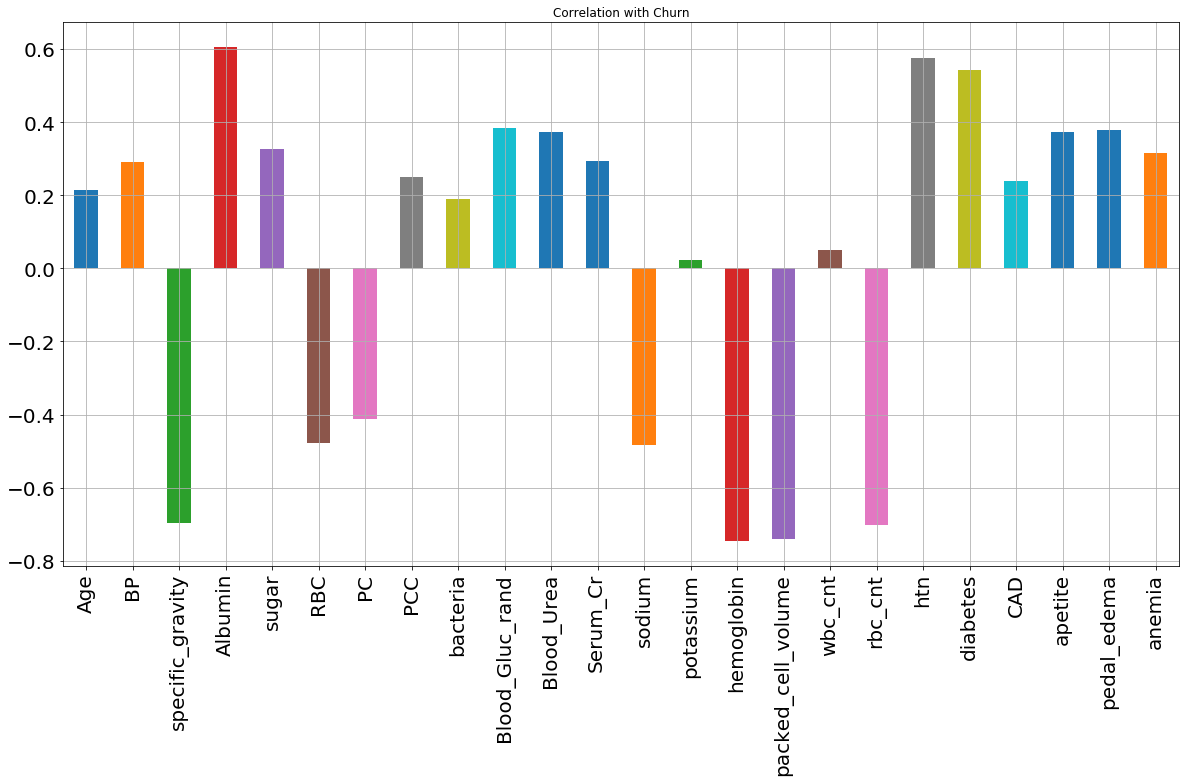

In [18]:
X.corrwith(df['class']).plot.bar(
        figsize = (20, 10), title = "Correlation with Churn", fontsize = 20,
        rot = 90, grid = True)

In [19]:
cols=['potassium','wbc_cnt']
X=X.drop(cols,axis=1)
X.head()

,Age,BP,specific_gravity,Albumin,sugar,RBC,PC,PCC,bacteria,Blood_Gluc_rand,...,sodium,hemoglobin,packed_cell_volume,rbc_cnt,htn,diabetes,CAD,apetite,pedal_edema,anemia
0,48.0,80.0,1.020,1,0,1,1,0,0,121.0000,...,107.61625,15.4,44.0,5.0000,1,1,0,0,0,0
1,7.0,50.0,1.020,4,0,1,1,0,0,131.7525,...,107.61625,11.3,38.0,2.8525,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0000,...,107.61625,9.6,31.0,2.8525,0,1,0,1,0,1
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0000,...,111.00000,11.2,32.0,3.0000,1,0,0,1,1,1
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0000,...,107.61625,11.6,35.0,4.0000,0,0,0,0,0,0


In [20]:
cols_remove=['CAD','bacteria','PCC','anemia','PC','apetite','sugar']
X=X.drop(cols_remove, axis=1)
X.head()

,Age,BP,specific_gravity,Albumin,RBC,Blood_Gluc_rand,Blood_Urea,Serum_Cr,sodium,hemoglobin,packed_cell_volume,rbc_cnt,htn,diabetes,pedal_edema
0,48.0,80.0,1.020,1,1,121.0000,36.0,1.2,107.61625,15.4,44.0,5.0000,1,1,0
1,7.0,50.0,1.020,4,1,131.7525,18.0,0.8,107.61625,11.3,38.0,2.8525,0,0,0
2,62.0,80.0,1.010,2,1,423.0000,53.0,1.8,107.61625,9.6,31.0,2.8525,0,1,0
3,48.0,70.0,1.005,4,1,117.0000,56.0,3.8,111.00000,11.2,32.0,3.0000,1,0,1
4,51.0,80.0,1.010,2,1,106.0000,26.0,1.4,107.61625,11.6,35.0,4.0000,0,0,0


In [21]:
X.columns

Index(['Age', 'BP', 'specific_gravity', 'Albumin', 'RBC', 'Blood_Gluc_rand',
       'Blood_Urea', 'Serum_Cr', 'sodium', 'hemoglobin', 'packed_cell_volume',
       'rbc_cnt', 'htn', 'diabetes', 'pedal_edema'],
      dtype='object')

In [22]:
X.shape

(400, 15)

In [23]:
from sklearn.model_selection import train_test_split

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.15, random_state=178)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_red = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=21)
rf_gini_red.fit(X_train_red, y_train_red)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

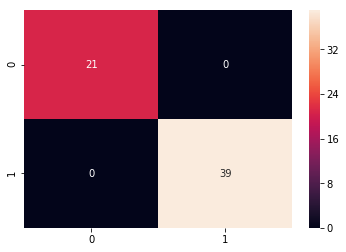

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_rfg_red = rf_gini_red.predict(X_test_red)
cm_red = confusion_matrix(y_test_red, y_predict_rfg_red)

sns.heatmap(cm_red,annot=True,fmt="d")

In [31]:
prob=rf_gini_red.predict_proba(X_test_red)
round(prob[10, 1] * 100, 2)

87.0

In [34]:
prob

array([[0.02, 0.98],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.13, 0.87],
       [0.  , 1.  ],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.38, 0.62],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.11, 0.89],
       [0.17, 0.83],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.06,

In [77]:
cols2=['pedal_edema','BP','Age']
X=X.drop(cols2, axis=1)
X=X.drop(['RBC'],axis=1)
X.head()

,specific_gravity,Albumin,Blood_Gluc_rand,Blood_Urea,Serum_Cr,sodium,hemoglobin,packed_cell_volume,rbc_cnt,htn,diabetes
0,1.020,1,121.0000,36.0,1.2,107.61625,15.4,44.0,5.0000,1,1
1,1.020,4,131.7525,18.0,0.8,107.61625,11.3,38.0,2.8525,0,0
2,1.010,2,423.0000,53.0,1.8,107.61625,9.6,31.0,2.8525,0,1
3,1.005,4,117.0000,56.0,3.8,111.00000,11.2,32.0,3.0000,1,0
4,1.010,2,106.0000,26.0,1.4,107.61625,11.6,35.0,4.0000,0,0


In [79]:
X.shape

(400, 11)

In [80]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.15, random_state=141)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_gini_s = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=21)
rf_gini_s.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

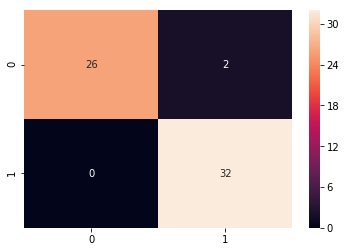

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_rfg_s = rf_gini_s.predict(X_test_1)
cm_1 = confusion_matrix(y_test_1, y_predict_rfg_s)

sns.heatmap(cm_1,annot=True,fmt="d")

In [83]:
print(classification_report(y_test_1, y_predict_rfg_s))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.94      1.00      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



In [84]:
importances = rf_gini_s.feature_importances_

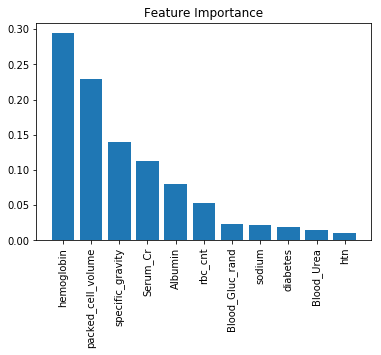

In [85]:
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [86]:
import pickle
with open('ckd_random_red.pkl', 'wb') as file:
 pickle.dump(rf_gini_s, file)